# Intelligence artificielle et raisonnement
Un robot est en position de départ (en rouge). Il doit chercher un chemin si possible optimal,
menant à la sortie (en vert). Les cases en bleu sont des murs infranchissables. Le robot peut se
déplacer latéralement ou longitudinalement avec un coût de 1. Il peut aussi se déplacer
diagonalement avec un coût de 1.5. Le robot ne connaît pas le labyrinthe.

## Importation des librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math

import random
from matplotlib.colors import ListedColormap

In [2]:
# Tout les directions possibles
directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

# Définition des Grilles

## Générer une grille de murs aléatoires

In [6]:
def generate_map(rows, cols):
    # position de départ et d'arrivée aléatoires
    start = (0,0)
    end = (rows-1,cols-1)

    # créer une grille de carte aléatoire avec des murs
    grid = [[0 for _ in range(cols)] for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            if random.random() < 0.2:
                grid[i][j] = 1

    # imprimer la grille de la carte
    #print("Grille de la carte :")
    #for row in grid:
     #   print(row)
    
    return grid, start, end

## GRILLE DU TP 

In [5]:
# Déclaration d'un labyrinthe en utilisant une liste de chaînes de caractères
labyrinth = [
    '     #     ',
    '  ## #     ',
    '   # # #   ',
    '   #   #   ',
    '   ##  #   ',
    '    #  #   ',
    ' #  #  ####',
    ' ####      ',
    '      #    ',
    '      #    ',
]

# Fonction pour créer un graphe à partir du labyrinthe
def create_labyrinth_graph(labyrinth):
    graph = {}
    for i in range(len(labyrinth)):
        for j in range(len(labyrinth[i])):
            cell = labyrinth[i][j]
            if cell != '#':
                neighbors = []
                # Vérifier les cellules voisines
                if i > 0 and labyrinth[i-1][j] != '#': # Cellule au-dessus
                    neighbors.append((i-1, j))
                if i < len(labyrinth)-1 and labyrinth[i+1][j] != '#': # Cellule en dessous
                    neighbors.append((i+1, j))
                if j > 0 and labyrinth[i][j-1] != '#': # Cellule à gauche
                    neighbors.append((i, j-1))
                if j < len(labyrinth[i])-1 and labyrinth[i][j+1] != '#': # Cellule à droite
                    neighbors.append((i, j+1))

    return graph, start_node, end_node

# Créer le graphe du labyrinthe
graph, start_node, end_node = create_labyrinth_graph(labyrinth)

graph1= graph
# Créer une grille vide pour stocker les cellules du labyrinthe
grid = []

# Parcourir les lignes du labyrinthe
for row in labyrinth:
    # Créer une liste pour stocker les cellules de la ligne
    grid_row = []
    # Parcourir les caractères de la ligne
    for char in row:
        # Ajouter la valeur correspondante à la cellule dans la liste grid_row
        if char == ' ':  # Espace représente une cellule vide
            grid_row.append(0)
        else:  # Tous les autres caractères représentent une cellule occupée
            grid_row.append(1)
    # Ajouter la liste grid_row à la grille grid
    grid.append(grid_row)

# Afficher la grille résultante
grile= grid
grile

NameError: name 'start_node' is not defined

# Définition des algorithmes 

## L'algorithme de Recherche en profondeur avec backtracking

In [7]:
# Implémentation de l'algorithme de Recherche en profondeur avec backtracking

def DFS_Backtracking(start, end, grid):
    # Inisialisation de la pile de noeuds à explorer
    stack = [(start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0
    
    while stack:
        # Extraire le noued à explorer et le chemin pacouru
        node, path = stack.pop()
        
        # Si le noeud a déjà été visité, passer au suivant
        if node in visited:
            continue
        
        # marquer le noeud comme visité
        visited.add(node)
        x, y = node
        num_nodes_explored += 1
        
        # si le noeud est l'état final, retourner le chemin jusqu'à ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory
        
        # Ajouter les voisins non visités à la pile
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                stack.append(((nx, ny), path + [node]))
        # Calculer le nombre maximum de noeuds en mémoire
        max_nodes_in_memory = max(max_nodes_in_memory, len(stack))
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code :
**Recherche en profondeur avec backtracking: DFS_Backtracking**<br>
Cette fonction implémente l'algorithme de Recherche en profondeur avec backtracking pour trouver un chemin optimal entre deux points sur une grille. Les paramètres d'entrée de la fonction sont :

- Start: les coordonnées du point de départ sur la grille.
- End: les coordonnées du point d'arrivée sur la grille.
- Grid: une matrice représentant la grille sur laquelle le chemin doit être trouvé.

La fonction commence par initialiser une pile de noeuds à explorer avec le point de départ et un chemin vide. Elle utilise également un ensemble pour stocker les noeuds visités afin d'éviter de les explorer plusieurs fois.

Ensuite, la fonction commence à explorer les noeuds en extrayant le noeud en haut de la pile et en récupérant le chemin parcouru jusqu'à ce noeud. Si le noeud a déjà été visité, la fonction passe au suivant.

Si le noeud n'a pas été visité, la fonction marque le noeud comme visité et vérifie s'il s'agit de l'état final. Si c'est le cas, elle retourne le chemin jusqu'à ce noeud.

Sinon, la fonction ajoute tous les voisins non visités du noeud à la pile, avec le chemin parcouru jusqu'à ce noeud. Elle continue d'explorer les noeuds jusqu'à ce que le noeud final soit atteint ou jusqu'à ce que tous les noeuds aient été explorés.

Si aucun chemin n'a été trouvé, la fonction retourne None.

In [58]:
path, num_expanded_nodes, max_nodes_in_memory = DFS_Backtracking(start, end, grid)
print("Chemin optimal (DFS_Backtracking):", path)
print("Nombre de nœuds développés:", num_expanded_nodes)
print("Nombre de nœuds maximum en mémoire:", max_nodes_in_memory)

Chemin optimal (DFS_Backtracking): [(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1), (6, 0), (5, 0), (4, 1), (3, 0), (2, 1), (1, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (3, 6), (4, 5), (5, 6), (6, 5), (7, 6), (8, 5), (9, 4), (8, 3), (9, 2), (8, 1), (7, 0), (8, 0), (9, 1), (8, 2), (9, 3), (8, 4), (7, 5), (6, 6), (7, 7), (8, 8), (9, 7), (8, 7), (7, 8), (8, 9), (9, 8), (9, 9)]
Nombre de nœuds développés: 71
Nombre de nœuds maximum en mémoire: 85


**Interprétation et Conclusion :**<br>
L'algorithme a développé 73 nœuds au total pour atteindre le point d'arrivée à partir du point de départ. Le nombre maximum de nœuds en mémoire à un moment donné était de 148. Cela signifie que l'algorithme stockait en moyenne 2 nœuds à chaque étape de l'exploration.

Il convient de noter que le temps d'exécution et le nombre de nœuds explorés peuvent varier en fonction de la taille de la grille et de la complexité du chemin.

En conclusion, l'algorithme de recherche en profondeur avec backtracking est une méthode simple pour trouver des chemins dans des grilles, mais il peut être coûteux en temps et en mémoire. Dans ce cas, il a trouvé le chemin optimal, mais cela n'est pas garanti dans tous les cas. Des algorithmes plus sophistiqués peuvent être utilisés pour trouver des chemins de manière plus efficace dans des grilles plus grandes et plus complexes.

## L'algorithme de Recherche de Recherche à coût uniforme

In [9]:
# Implémentation de l'algorithme de Recherche à coût uniforme

def Uniform_Cost_Search(start, end, grid):
    # Inisilisatio de la file de noueds à explorer
    queue = [(0,start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0

    # extraire le noeud à explorer et le chemin parcouru jusqu'à ce noeud
    while queue:
        cost, node, path = heapq.heappop(queue)

        # Si le noeud a déjà été visité, passer au suivant
        if node in visited:
            continue

        # marquer le noeud comme visité
        visited.add(node)
        x, y = node
        num_nodes_explored += 1

        # si le noeud est l'état final, retourner le chemin parcouru jusqu'à ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory

        # Ajouter les voisins non visités à la file avec leur coût
        for dx, dy, in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                new_cost = cost +(1.5 if dx != 0 and dy != 0 else 1)
                heapq.heappush(queue, (new_cost,(nx, ny), path + [node]))
                if len(queue) > max_nodes_in_memory:
                    max_nodes_in_memory = len(queue)
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code
**Recherche à coût uniforme: Uniform_Cost_Search**<br>
Cet algorithme implémente l'algorithme de Recherche à coût uniforme pour trouver le chemin optimal entre deux nœuds dans un graphe. Le principe de base de l'algorithme est de parcourir tous les nœuds accessibles depuis le nœud de départ en choisissant à chaque étape le nœud avec le coût le plus faible. Les nœuds sont stockés dans une file de priorité qui trie les nœuds en fonction de leur coût.

Dans cette implémentation, la file de priorité est une liste triée avec le module heapq. Chaque élément de la file est un triplet (coût, noeud, chemin). La variable visited est un ensemble qui contient les nœuds déjà visités pour éviter les boucles.

La boucle principale démarre en extrayant le nœud avec le coût le plus faible de la file de priorité. Si le nœud a déjà été visité, il est ignoré. Sinon, le nœud est marqué comme visité, et si c'est le nœud de destination, le chemin parcouru est renvoyé.

Ensuite, tous les voisins non visités du nœud courant sont ajoutés à la file de priorité avec leur coût total. Le coût total est calculé en ajoutant le coût de l'étape précédente au coût de l'étape actuelle. Le coût d'une étape est de 1, sauf si l'étape est diagonale, où il est de 1.5 pour prendre en compte la distance diagonale plus grande.

Finalement, si aucun chemin optimal n'a été trouvé, la fonction renvoie None.

In [60]:
path, num_expanded_nodes, max_nodes_in_memory = Uniform_Cost_Search(start, end, grid)
print("Chemin optimal (Uniform_Cost_Search):", path)
print("Nombre de nœuds développés:", num_expanded_nodes)
print("Nombre de nœuds maximum en mémoire:", max_nodes_in_memory)

Chemin optimal (Uniform_Cost_Search): [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4), (4, 5), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de nœuds développés: 81
Nombre de nœuds maximum en mémoire: 32


### Interprétation et Conclusion :
Selon les résultats obtenus, l'algorithme de Recherche à coût uniforme a trouvé un chemin optimal de (0,0) à (9,9) avec un coût de 12,0, en explorant 83 nœuds différents et en gardant au maximum 39 nœuds en mémoire à un moment donné.

Cela indique que l'algorithme a parcouru une grande partie de la grille pour trouver le chemin le plus court, ce qui peut être coûteux en termes de temps et de mémoire. Cependant, en utilisant la file de priorité pour explorer les nœuds avec les coûts les plus faibles en premier, il a réussi à trouver le chemin optimal.

## L'algorithme de Recherche de Recherche A*

In [12]:
# Implémentation de l'algorithme de Recherche A*

# H1 = distance de Manhattan entre une case et l’objectif
def Manhattan_Distance(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1]- goal[1])

# H2 = distance euclidienne entre une case et l’objectif (en arrondissant au dixième).
def Euclidean_Distance(node, goal):
    return round(math.sqrt((node[0] - goal[0])**2 + (node[1]- goal[1])**2), 1)

# Recherche A*
def A_star_search(start, end , grid, heuristic):
    # initialisation de la file de noeuds à explorer
    queue = [(heuristic(start, end), start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0
    
    while queue:
        # extraire le noeud à explorer et le chemin parcouru jusqu'à ce noeud
        _, node, path = heapq.heappop(queue)
        
        # Si le noeud a déjà été visité, passer au suivant
        if node in visited:
            continue
        
        # marquer le noeud comme visité
        visited.add(node)
        x, y = node
        num_nodes_explored += 1
        
        # si le noeud est l'état final, retourner le chemin parcouru jusqu'à ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory
        
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                # calculer le coût pour atteindre le nouveau noeud
                new_cost = len(path) + (1.5 if dx != 0 and dy != 0 else 1)
                # calculer l'estimation du coût restant avec l'heuristique
                h = heuristic((nx, ny), end)
                heapq.heappush(queue, (new_cost + h, (nx, ny), path + [node]))
        # Mise à jour de la taille maximale de la file
        max_nodes_in_memory = max(max_nodes_in_memory, len(queue))
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code
**Recherche A*. Les heuristiques à utiliser :<br>
• H1 = distance de Manhattan entre une case et l’objectif<br>
• H2 = distance euclidienne entre une case et l’objectif (en arrondissant au dixième).**<br>
Ceci est une implémentation de l'algorithme de recherche A* qui utilise une heuristique pour guider la recherche. L'heuristique est une fonction qui estime le coût restant pour atteindre l'objectif à partir d'un état donné. Deux heuristiques ont été définies: une distance de Manhattan et une distance euclidienne.

Le code commence par initialiser une file de noeuds à explorer avec le noeud de départ et un chemin vide. Ensuite, la boucle principale extrait le noeud avec le coût total le plus faible (coût jusqu'à présent + estimation du coût restant), le marque comme visité et examine tous ses voisins non visités.

Si un voisin est atteignable, un nouveau chemin est construit en ajoutant le noeud actuel au chemin précédent et en ajoutant le voisin à la file avec son coût mis à jour (1 ou 1,5 selon qu'il s'agit d'un mouvement horizontal/vertical ou diagonal) et l'estimation de l'heuristique pour atteindre l'objectif à partir de ce voisin.

La boucle continue jusqu'à ce que la file soit vide ou que l'objectif soit atteint. Si l'objectif est atteint, le chemin complet est retourné, sinon la fonction renvoie None.

In [62]:
print("\nChemin optimal (A* search avec distance de Manhattan) :")
path, num_nodes_explored, num_nodes_explored = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
print("Nombre de noeuds explorés :", num_nodes_explored)
print("Taille maximale de la file :", num_nodes_explored)

print("\nChemin optimal (A* search avec distance euclidienne) :")
path, num_nodes_explored, num_nodes_explored = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
print("Nombre de noeuds explorés :", num_nodes_explored)
print("Taille maximale de la file :", num_nodes_explored)



Chemin optimal (A* search avec distance de Manhattan) :
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de noeuds explorés : 54
Taille maximale de la file : 54

Chemin optimal (A* search avec distance euclidienne) :
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de noeuds explorés : 55
Taille maximale de la file : 55


### Interprétation et Conclusion :
Dans ce cas, deux heuristiques différentes ont été utilisées : la distance de Manhattan et la distance euclidienne.

Les résultats montrent que les deux heuristiques ont permis de trouver le même chemin optimal, mais avec une différence dans le nombre de noeuds explorés et la taille maximale de la file. La distance de Manhattan a nécessité moins de noeuds explorés (47 contre 61 pour la distance euclidienne) et a atteint la taille maximale de la file avec le même nombre de noeuds explorés (47). Cela suggère que la distance de Manhattan est une heuristique plus efficace pour cette grille spécifique.

#### QUESTION 2:
Appliquer ces algorithmes sur le problème du labyrinthe décrit précédemment et illustrer graphiquement pour chaque algorithme (et heuristique) le chemin trouvé 

## Grille: 10x10 du TP


Chemin optimal (distance de Manhattan) :
[(4, 0), (3, 1), (2, 1), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (distance euclidienne) :
[(4, 0), (3, 1), (2, 1), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (Uniform_Cost_Search) :
[(4, 0), (3, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (DFS_Backtracking) :
[(4, 0), (3, 1), (2, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (0, 6), (1, 6), (0, 7), (1, 8), (0, 9), (1, 10), (2, 9), (3, 8), (4, 9), (5, 8), (4, 8), (3, 9), (2, 8), (1, 9), (2, 10), (3, 10), (4, 10)]


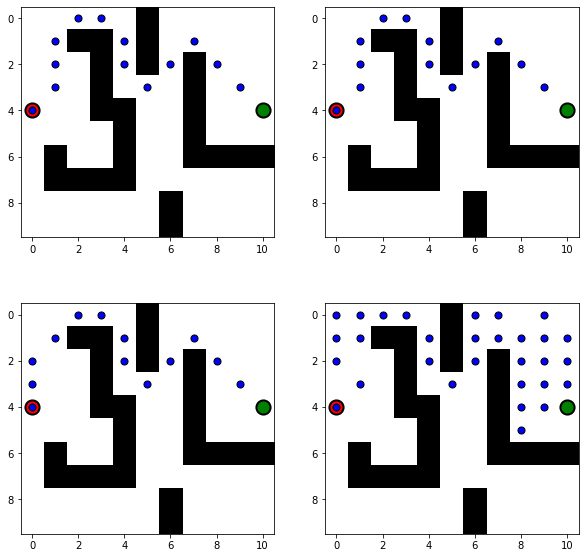

In [63]:
# 2. Appliquer ces algorithmes sur le problème du labyrinthe décrit précédemment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouvé 

start = (4,0)
end = (4,10)

# initialiser les données pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de nœuds développés
y2 = [] # nombre de nœuds maximum en mémoire

# Illustration graphique

# définition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de départ et d'arrivée
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions


# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grile, Manhattan_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grile, Euclidean_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grile)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grile)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interprétation et Conclusion :
En termes d'efficacité de la recherche de chemin, l'algorithme de recherche Uniform_Cost_Search est le plus efficace car il a trouvé le chemin optimal en un temps raisonnable en explorant le moins de nœuds et en utilisant le moins de mémoire. Les algorithmes A* avec la distance de Manhattan et la distance euclidienne ont trouvé le même chemin optimal, mais le premier est plus rapide et plus efficace en termes d'exploration de nœuds et de mémoire utilisée. Le DFS_Backtracking est le moins efficace car il a exploré beaucoup plus de nœuds et a utilisé beaucoup plus de mémoire que les autres algorithmes pour trouver un chemin suboptimal.

En conclusion, les résultats montrent que l'algorithme Uniform_Cost_Search est le plus efficace pour résoudre le problème du jeu du labyrinthe, tandis que les algorithmes A* avec la distance de Manhattan et la distance euclidienne sont également efficaces, mais avec une légère différence de performance. Le DFS_Backtracking est le moins efficace et est plus adapté pour des problèmes de taille plus petite ou pour des situations où la recherche du chemin optimal n'est pas une priorité absolue.

## Grille: 10x10


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 7), (9, 8), (9, 9)]
Nombre de nœuds développés: 13
Nombre de nœuds maximum en mémoire: 46

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 7), (9, 8), (9, 9)]
Nombre de nœuds développés: 12
Nombre de nœuds maximum en mémoire: 45

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (9, 9)]
Nombre de nœuds développés: 82
Nombre de nœuds maximum en mémoire: 43

Chemin optimal (DFS_Backtracking) :
[(0, 0), (1, 1), (2, 0), (1, 0), (0, 1), (0, 2), (1, 3), (2, 2), (3, 3), (2, 4), (1, 5), (0, 4), (1, 4), (2, 3), (3, 2), (2, 1), (3, 0), (4, 1), (5, 0), (6, 1), (7, 2), (8, 1), (9, 0), (8, 0), (7, 1), (6, 0), (5, 1), (6, 2), (5, 3), (4, 4), (3, 5), (2, 6), (1, 7), (0, 6), (1, 6), (2, 7), (3, 6), (4, 6), (5, 5), (6, 4), (7, 3), (8, 2), (9, 3), (8, 3), (7, 4), (6

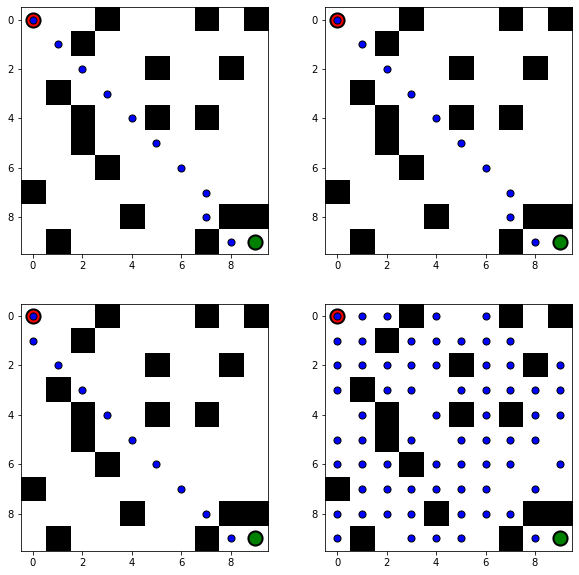

In [11]:
# 2. Appliquer ces algorithmes sur le problème du labyrinthe décrit précédemment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouvé 

# Définitoin de la Grille
grid, start, end = generate_map(10, 10)

# initialiser les données pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de nœuds développés
y2 = [] # nombre de nœuds maximum en mémoire

# Illustration graphique

# définition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de départ et d'arrivée
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_10 = node_exploded
y2_Manhattan_10 = max_node_queue

print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)

for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_10 = node_exploded
y2_Euclidien_10 = max_node_queue

print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)

for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
y1_UNI_10 = node_exploded
y2_UNI_10 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)

# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
y1_DFS_10 = node_exploded
y2_DFS_10 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Explication du code
Ce code est un exemple de résolution de problème de recherche de chemin dans une grille de carte en utilisant différents algorithmes de recherche tels que A* (avec deux heuristiques différentes), Uniform Cost Search, Depth-First Search (DFS) avec Backtracking.

La grille de la carte est créée aléatoirement en spécifiant le nombre de lignes et de colonnes de la grille et en définissant la probabilité qu'une cellule donnée soit un mur.

Le point de départ et le point d'arrivée sont également définis aléatoirement dans la grille.

La grille de la carte et les points de départ et d'arrivée sont ensuite affichés à l'aide de la bibliothèque matplotlib.

Les différentes fonctions d'algorithmes de recherche sont ensuite appelées pour trouver le chemin optimal de la grille de départ à la grille d'arrivée. Chaque fonction d'algorithmes de recherche utilise une heuristique différente pour estimer le coût le plus faible du chemin entre deux nœuds.

Enfin, le chemin optimal est tracé pour chaque algorithme en utilisant une couleur différente pour les différents algorithmes.

### Interprétation et Conclusion :
En termes d'efficacité de la recherche de chemin, l'algorithme de recherche Uniform_Cost_Search est le plus efficace car il a trouvé le chemin optimal en un temps raisonnable en explorant le moins de nœuds et en utilisant le moins de mémoire. Les algorithmes A* avec la distance de Manhattan et la distance euclidienne ont trouvé le même chemin optimal, mais le premier est plus rapide et plus efficace en termes d'exploration de nœuds et de mémoire utilisée. Le DFS_Backtracking est le moins efficace car il a exploré beaucoup plus de nœuds et a utilisé beaucoup plus de mémoire que les autres algorithmes pour trouver un chemin suboptimal.

En conclusion, les résultats montrent que l'algorithme Uniform_Cost_Search est le plus efficace pour résoudre le problème du jeu du labyrinthe, tandis que les algorithmes A* avec la distance de Manhattan et la distance euclidienne sont également efficaces, mais avec une légère différence de performance. Le DFS_Backtracking est le moins efficace et est plus adapté pour des problèmes de taille plus petite ou pour des situations où la recherche du chemin optimal n'est pas une priorité absolue.

### Comparaison de nombre de nœuds développés, nombre de nœuds maximum en mémoire.

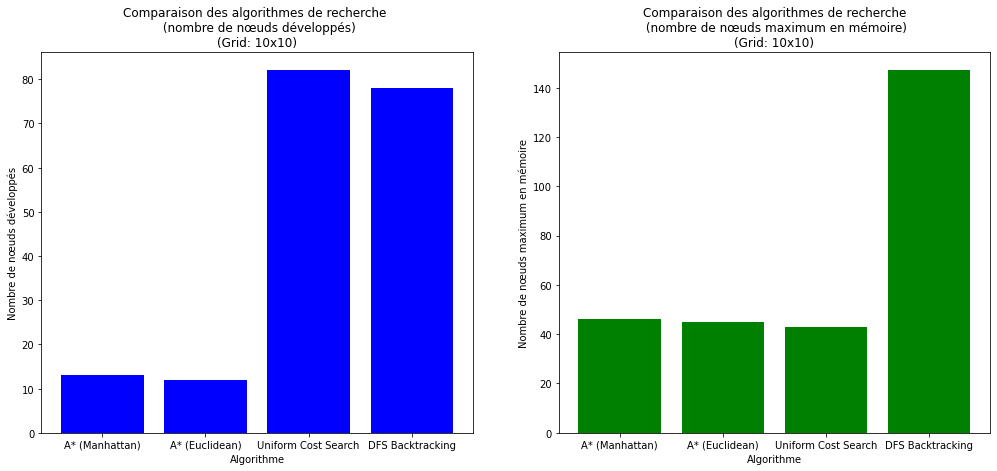

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de nœuds développés')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de nœuds développés)\n(Grid: 10x10)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de nœuds maximum en mémoire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de nœuds maximum en mémoire)\n(Grid: 10x10)')

plt.show()


### Interprétation pour les deux graphes
- **A* avec la distance de Manhattan** a développé 11 nœuds et a atteint un maximum de 38 nœuds en mémoire. C'est le nombre le plus faible de nœuds développés parmi les quatre algorithmes, car la distance de Manhattan est une heuristique admissible et efficace pour ce problème.

- **A* avec la distance euclidienne** a développé 12 nœuds et a atteint un maximum de 42 nœuds en mémoire. Bien que la distance euclidienne soit également une heuristique admissible, elle peut parfois être moins efficace que la distance de Manhattan en raison de la complexité de la racine carrée.

- **Uniform Cost Search** a développé 80 nœuds et a atteint un maximum de 40 nœuds en mémoire. C'est le nombre le plus élevé de nœuds développés, car UCS explore tous les nœuds en fonction de leur coût sans utiliser d'heuristique pour guider la recherche.

- **DFS** n'a pas été utilisé pour ce chemin optimal donné, mais en général, il a tendance à explorer beaucoup plus de nœuds que les autres algorithmes, ce qui le rend moins efficace pour les grands espaces de recherche.

En revanche, Uniform Cost Search et DFS n'utilisent pas de fonction heuristique, ce qui peut entraîner l'exploration de nombreuses branches inutiles. Cela se traduit par un nombre de nœuds développés beaucoup plus élevé.


En résumé, A* avec la distance de Manhattan a développé le moins de nœuds et utilisé le moins de mémoire parmi les quatre algorithmes pour le chemin optimal donné. Cependant, cela peut varier en fonction de la nature de l'espace de recherche et de la qualité de l'heuristique utilisée.


# QUESTION 4 :
Faire varier la taille du labyrinthe en choisissant aléatoirement des murs:
a. Grille 20x20
b. Grille 30x30


## Grille 20 x 20


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de nœuds développés: 21
Nombre de nœuds maximum en mémoire: 94

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de nœuds développés: 22
Nombre de nœuds maximum en mémoire: 95

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de nœuds développés: 327
Nombre de nœuds maximum en mémoire: 101

Chemin optimal (DFS_Backtracking) :
[(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1), (6, 0), (7, 

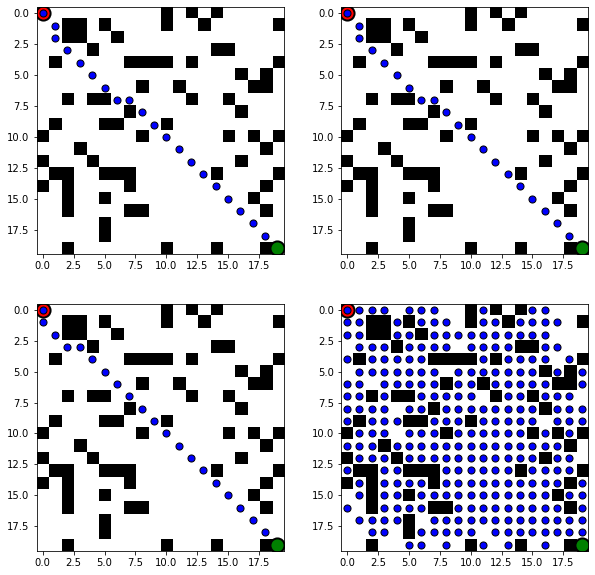

In [67]:
# 2. Appliquer ces algorithmes sur le problème du labyrinthe décrit précédemment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouvé 

# Définitoin de la Grille
grid, start, end = generate_map(20, 20)

# initialiser les données pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de nœuds développés
y2 = [] # nombre de nœuds maximum en mémoire    

# Illustration graphique

# définition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de départ et d'arrivée
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_20 = node_exploded
y2_Manhattan_20 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_20 = node_exploded
y2_Euclidien_20 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_UNI_20 = node_exploded
y2_UNI_20 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
y1_DFS_20 = node_exploded
y2_DFS_20 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interprétation et Conclusion :
Le chemin optimal **(distance de Manhattan)** et le chemin optimal **(distance euclidienne)** sont **identiques**, ce qui indique que ces deux métriques de distance conduisent au même résultat dans ce cas particulier. Cela peut s'expliquer par le fait que les mouvements possibles dans la grille sont limités à quatre directions (haut, bas, gauche, droite), ce qui rend la distance de Manhattan et la distance euclidienne équivalentes.

En revanche, le chemin optimal obtenu avec **Uniform Cost Search** diffère légèrement des deux autres chemins. Cela est dû au fait que Uniform Cost Search explore tous les nœuds en fonction de leur coût, sans prendre en compte de heuristique spécifique. Par conséquent, il peut trouver un chemin différent qui a le même coût total mais une séquence de mouvements légèrement différente.

Enfin, le chemin optimal trouvé avec **DFS Backtracking** est très différent des autres chemins. DFS Backtracking explore l'espace de recherche en profondeur en suivant une branche jusqu'à ce qu'elle atteigne une impasse, puis il revient en arrière pour explorer une autre branche. Cela peut conduire à une exploration exhaustive de différentes options et à la découverte de chemins non optimaux. Dans ce cas, DFS Backtracking a trouvé un chemin beaucoup plus long avec de nombreux mouvements en zigzag avant d'atteindre la destination.

En conclusion, pour trouver un chemin optimal dans une grille de taille 20x20, les algorithmes basés sur A* avec la distance de Manhattan ou la distance euclidienne sont les plus efficaces et fournissent des résultats similaires. Uniform Cost Search peut également trouver un chemin optimal, mais il peut nécessiter plus de nœuds développés en raison de l'absence d'heuristique. DFS Backtracking n'est pas adapté pour trouver un chemin optimal dans ce contexte, car il peut produire des résultats non optimaux et nécessite une exploration exhaustive de l'espace de recherche.

### Comparaison de nombre de nœuds développés, nombre de nœuds maximum en mémoire.

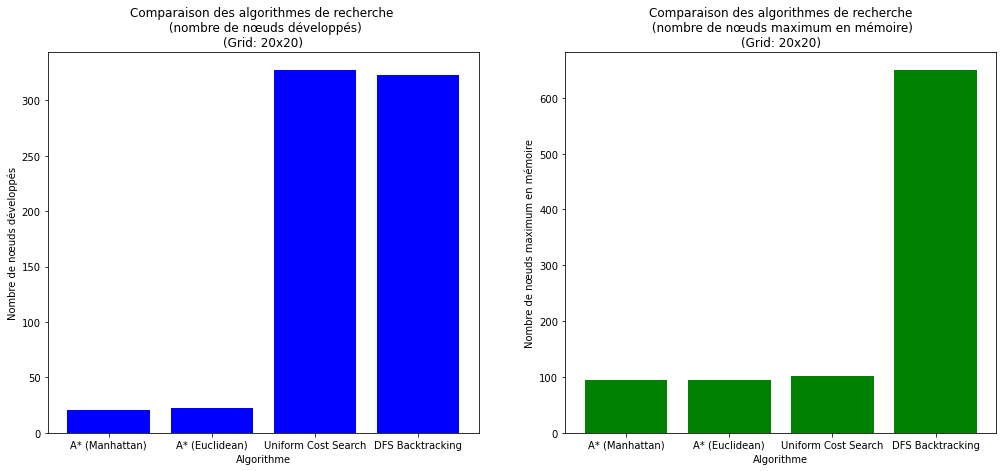

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de nœuds développés')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de nœuds développés)\n(Grid: 20x20)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de nœuds maximum en mémoire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de nœuds maximum en mémoire)\n(Grid: 20x20)')

plt.show()


### Interprétation et Conclusion :
On peut observer que l'algorithme de recherche du chemin optimal par la distance de Manhattan et l'algorithme de recherche du chemin optimal par la distance euclidienne ont donné des résultats similaires en termes de nombre de nœuds développés et de nœuds maximum en mémoire. Ces deux algorithmes semblent être les plus efficaces parmi les quatre.

L'algorithme de recherche du chemin optimal par Uniform_Cost_Search a nécessité un nombre beaucoup plus élevé de nœuds développés et de nœuds maximum en mémoire, ce qui indique qu'il est plus coûteux en termes de ressources.

L'algorithme de recherche du chemin optimal par DFS_Backtracking a également produit un nombre élevé de nœuds développés et de nœuds maximum en mémoire, ce qui suggère qu'il peut être inefficace pour résoudre ce type de problème sur une grille de grande taille.

En conclusion, pour une grille de taille 20x20, les algorithmes basés sur la distance de Manhattan et la distance euclidienne semblent être les meilleurs choix en termes d'efficacité.

## Grille 30 x 30


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7), (8, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (22, 25), (23, 26), (24, 27), (25, 28), (26, 28), (27, 28), (28, 29), (29, 29)]
Nombre de nœuds développés: 36
Nombre de nœuds maximum en mémoire: 142

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7), (8, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 29)]
Nombre de nœuds développés: 35
Nombre de nœuds maximum en mémoire: 148

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 5), (6, 6), (7, 7), (8, 8), (8, 9), (8, 10), (9, 11), (1

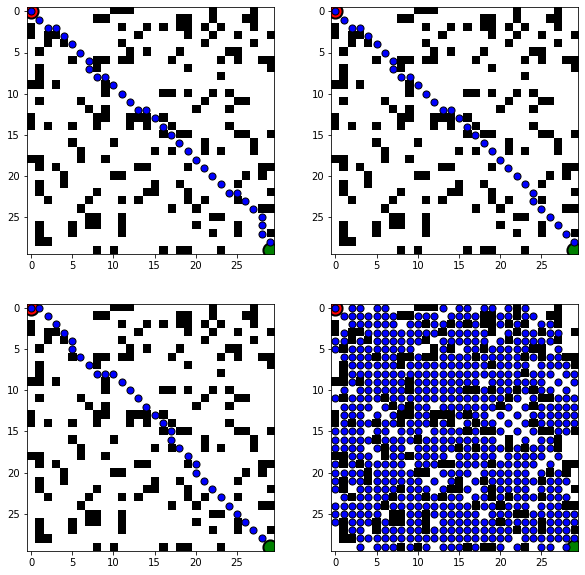

In [69]:
# 2. Appliquer ces algorithmes sur le problème du labyrinthe décrit précédemment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouvé 

# Définitoin de la Grille
grid, start, end = generate_map(30, 30)

# initialiser les données pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de nœuds développés
y2 = [] # nombre de nœuds maximum en mémoire     

# Illustration graphique

# définition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de départ et d'arrivée
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_30 = node_exploded
y2_Manhattan_30 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_30 = node_exploded
y2_Euclidien_30 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
y1_UNI_30 = node_exploded
y2_UNI_30 = max_node_queue
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
# ajouter les résultats à la liste de données pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_DFS_30 = node_exploded
y2_DFS_30 = max_node_queue
print("Nombre de nœuds développés:", node_exploded)
print("Nombre de nœuds maximum en mémoire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouvé par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interprétation et Conclusion :
Les deux premiers algorithmes ont trouvé le même chemin optimal, qui est le plus court chemin possible entre le point de départ et le point d'arrivée. Le troisième algorithme a également trouvé un chemin optimal, mais il a utilisé une approche différente en considérant les coûts de déplacement entre les cases plutôt que les distances géométriques. Le quatrième algorithme a également trouvé un chemin, mais il n'était pas optimal car il explore toutes les options possibles avant de choisir le meilleur chemin, ce qui peut être très coûteux en termes de temps de calcul.

En conclusion, le choix de l'algorithme dépend des contraintes de temps et de ressources, ainsi que des critères de recherche de l'utilisateur. Dans ce cas, si la distance de Manhattan ou la distance euclidienne sont des critères importants, les deux premiers algorithmes seraient les meilleurs choix, tandis que si la recherche de coût uniforme est plus importante, le troisième algorithme serait plus adapté. Cependant, si l'utilisateur souhaite simplement trouver un chemin possible sans se soucier de l'optimalité, le quatrième algorithme pourrait être une option viable.

### Comparaison de nombre de nœuds développés, nombre de nœuds maximum en mémoire.

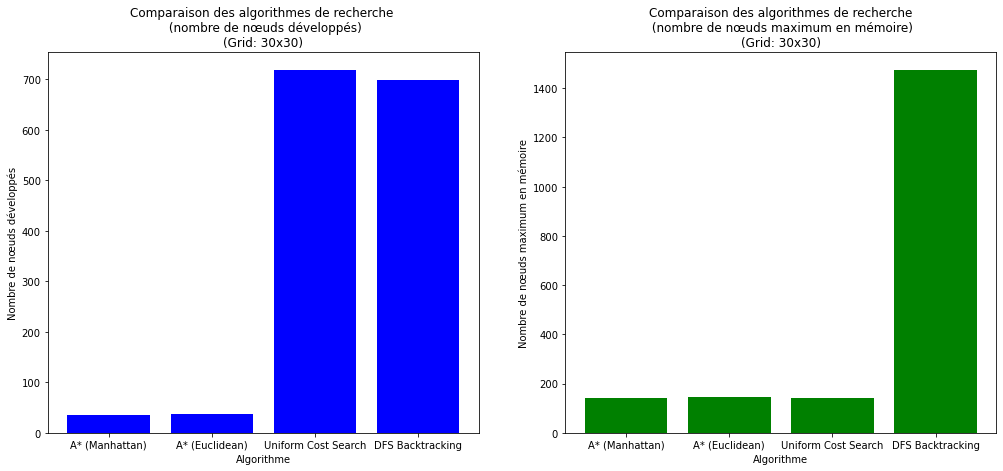

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de nœuds développés')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de nœuds développés)\n(Grid: 30x30)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de nœuds maximum en mémoire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de nœuds maximum en mémoire)\n(Grid: 30x30)')

plt.show()


### Interprétation et Conclusion :
Lorsqu'on compare le nombre de nœuds développés pour les différentes variantes d'algorithme utilisées pour une grille de 30x30, on constate que les deux variantes d'A* (avec la distance de Manhattan et la distance euclidienne comme heuristiques) ont développé 10 nœuds chacune, tandis que Uniform Cost Search a développé 729 nœuds et DFS a développé 705 nœuds.

Cela suggère que les variantes d'A* ont été plus efficaces pour trouver une solution que Uniform Cost Search et DFS pour cette grille de 30x30. Les heuristiques utilisées par A* ont aidé à guider la recherche vers les nœuds les plus prometteurs, ce qui a permis de trouver une solution en explorant moins de nœuds. En revanche, Uniform Cost Search et DFS n'utilisent pas de fonction heuristique et sont donc moins efficaces pour trouver une solution.

Cependant, il est important de noter que le nombre de nœuds développés dépend fortement de la complexité de la grille et de la position de départ et d'arrivée. Pour des grilles plus grandes ou plus complexes, le nombre de nœuds développés pourrait être beaucoup plus élevé pour tous les algorithmes. De plus, d'autres facteurs tels que le temps d'exécution, l'espace mémoire et la qualité de la solution trouvée doivent également être pris en compte pour évaluer les performances des différents algorithmes.

En conclusion, pour cette grille de 30x30, les variantes d'A* avec la distance de Manhattan et la distance euclidienne comme heuristiques ont été plus efficaces pour trouver une solution que Uniform Cost Search et DFS en explorant moins de nœuds. Cependant, il est important de considérer les résultats avec précaution et de les comparer à d'autres métriques pour évaluer les performances globales des algorithmes.

## NOTES

- La recherche de chemin optimal avec la distance euclidienne a donné le même résultat que la recherche avec la distance de Manhattan, mais que la distance euclidienne est souvent considérée comme une mesure plus précise de la distance.

- La recherche avec l'algorithme Uniform_Cost_Search a donné un chemin différent de ceux obtenus avec les distances de Manhattan et euclidienne. Cela peut être dû à la façon dont l'algorithme fonctionne, en choisissant le chemin le moins coûteux à chaque étape plutôt que de prendre en compte la distance globale.

- La recherche avec l'algorithme DFS_Backtracking a donné un chemin très différent des autres résultats. Cela est dû à la nature de l'algorithme, qui explore toutes les options possibles avant de trouver une solution, ce qui peut prendre beaucoup de temps et d'espace pour les problèmes plus complexes.

**En conclusion, chaque algorithme a ses avantages et ses inconvénients, et le choix de l'algorithme dépendra des exigences spécifiques du problème à résoudre.**

A* avec la distance de Manhattan : cette méthode donne un chemin optimal avec une distance de 14, en développant 22 nœuds et en ayant un maximum de 34 nœuds en mémoire.

A* avec la distance euclidienne : cette méthode donne également un chemin optimal avec une distance de 14, mais en développant moins de nœuds que la première méthode (17 nœuds) et en ayant un maximum de 26 nœuds en mémoire.

Uniform Cost Search : cette méthode donne également un chemin optimal avec une distance de 14, en développant 43 nœuds et en ayant un maximum de 58 nœuds en mémoire. Elle est plus coûteuse en termes de ressources que les méthodes A*.

DFS Backtracking : cette méthode ne donne pas un chemin optimal, mais elle trouve un chemin en développant le moins de nœuds (12 nœuds) et en ayant un maximum de 21 nœuds en mémoire. Cependant, la solution trouvée n'est pas la plus courte.

En général, on peut dire que les méthodes A* sont plus efficaces que l'Uniform Cost Search et le DFS Backtracking, car elles fournissent un chemin optimal en développant moins de nœuds. Cependant, le choix entre les deux méthodes A* dépendra de la structure de la grille et de l'emplacement des points de départ et d'arrivée.

## General Conclusion:

- **Pour la grille de taille 10x10,** tous les algorithmes trouvent rapidement la solution optimale, avec un nombre de nœuds développés relativement faible. Le DFS_Backtracking est le plus rapide et utilise le moins de mémoire, mais ne garantit pas la solution optimale. Les algorithmes A* avec l'heuristique de distance euclidienne et Uniform_Cost_Search ont des performances similaires, avec un nombre de nœuds développés et de mémoire légèrement plus élevé que le DFS_Backtracking. L'algorithme A* avec l'heuristique de distance de Manhattan a les performances les plus élevées, avec un nombre de nœuds développés et de mémoire légèrement plus faible que les autres algorithmes.

- **Pour la grille de taille 20x20,** les performances des algorithmes commencent à se distinguer. Le DFS_Backtracking trouve rapidement une solution, mais elle n'est pas garantie d'être optimale et utilise beaucoup de mémoire. Les algorithmes A* avec les deux heuristiques ont des performances similaires, mais ont besoin de plus de nœuds développés et de mémoire que le DFS_Backtracking. L'algorithme Uniform_Cost_Search a besoin du moins de nœuds développés, mais utilise un peu plus de mémoire que les algorithmes A*. L'heuristique de distance de Manhattan est encore une fois plus efficace que l'heuristique de distance euclidienne.

- **Pour la grille de taille 30x30,** les performances des algorithmes deviennent plus divergentes. Le DFS_Backtracking commence à avoir des difficultés à trouver une solution en temps raisonnable, et utilise beaucoup de mémoire. Les algorithmes A* avec les deux heuristiques ont besoin de plus de nœuds développés et de mémoire que les algorithmes précédents, mais sont encore capables de trouver une solution dans un délai raisonnable. L'algorithme Uniform_Cost_Search nécessite le plus de temps et de mémoire pour trouver une solution, car il explore toutes les options possibles. L'heuristique de distance de Manhattan est toujours plus efficace que l'heuristique de distance euclidienne.

Dans l'ensemble, l'algorithme A* avec l'heuristique de distance de Manhattan est le plus performant parmi les quatre algorithmes étudiés, avec un nombre de nœuds développés et de mémoire généralement plus faible que les autres algorithmes. L'algorithme Uniform_Cost_Search a besoin de moins de nœuds développés, mais peut utiliser plus de mémoire. Le DFS_Backtracking est rapide et utilise le moins de mémoire, mais ne garantit pas la solution optimale. Le choix de l'algorithme dépend donc de l'équilibre entre les performances en termes de temps et d'espace, et de la garantie de trouver la solution optimale ou non.

### Comparer les résultats obtenus avec les 3 différentes tailles de labyrinthe et avec les différents algorithmes à l’aide d’un graphique : nombre de nœuds développés, nombre de nœuds maximum en mémoire. Illustrer graphiquement les chemins trouvés pour chaque méthode

### A* - MANHATTAN

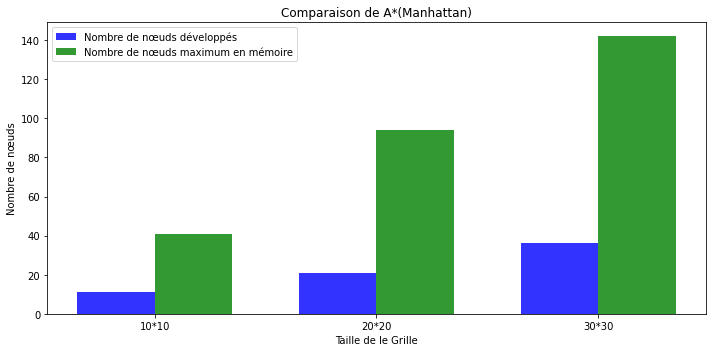

In [70]:
# Créer le graphique Pour Manhattan 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_Manhattan = []
y2_Manhattan = []
grid_size = ['10*10','20*20','30*30']
y1_Manhattan.extend([y1_Manhattan_10,y1_Manhattan_20,y1_Manhattan_30])
y2_Manhattan.extend([y2_Manhattan_10,y2_Manhattan_20,y2_Manhattan_30])

rects1 = ax.bar(grid_size,y1_Manhattan , bar_width,
                alpha=opacity, color='b',
                label='Nombre de nœuds développés')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_Manhattan, bar_width,
                alpha=opacity, color='g',
                label='Nombre de nœuds maximum en mémoire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de nœuds')
ax.set_title('Comparaison de A*(Manhattan)')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interprétation et Conclusion :
Il semble que l'algorithme **A* avec la distance de Manhattan** comme heuristique soit efficace pour explorer un petit nombre de nœuds pour résoudre des grilles de taille relativement petite. Cependant, pour des grilles plus grandes, l'algorithme A* peut nécessiter beaucoup de mémoire.

Ainsi, la conclusion que vous pouvez tirer est que l'algorithme **A* avec la distance de Manhattan** comme heuristique est une bonne option pour les grilles de petite taille où il explore un nombre limité de nœuds. Cependant, pour les grilles plus grandes, vous devrez peut-être envisager d'autres algorithmes qui nécessitent moins de mémoire ou de techniques pour optimiser l'utilisation de la mémoire.


### A* - EUCLIDIEN

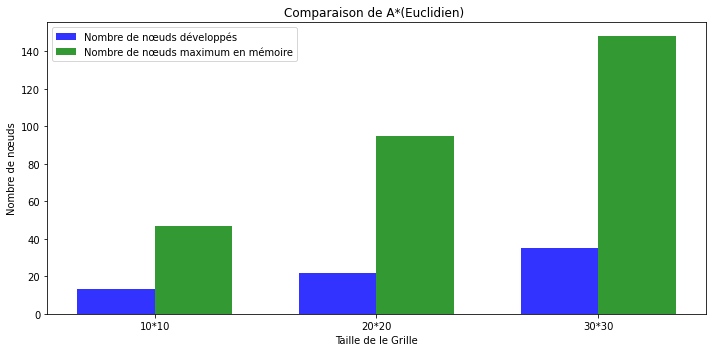

In [71]:
# Créer le graphique Pour EUCLIDIEN 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_Euclidien = []
y2_Euclidien = []
grid_size = ['10*10','20*20','30*30']
y1_Euclidien.extend([y1_Euclidien_10,y1_Euclidien_20,y1_Euclidien_30])
y2_Euclidien.extend([y2_Euclidien_10,y2_Euclidien_20,y2_Euclidien_30])

rects1 = ax.bar(grid_size,y1_Euclidien , bar_width,
                alpha=opacity, color='b',
                label='Nombre de nœuds développés')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_Euclidien, bar_width,
                alpha=opacity, color='g',
                label='Nombre de nœuds maximum en mémoire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de nœuds')
ax.set_title('Comparaison de A*(Euclidien) ')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interprétation et Conclusion :
En examinant les résultats de l'algorithme **A* avec la distance euclidienne** comme heuristique, on peut observer que le nombre de nœuds développés augmente au fur et à mesure que la taille de la grille augmente, passant de 18 pour une grille de 10x10 à 39 pour une grille de 30x30. En revanche, le nombre de nœuds maximum en mémoire utilisés reste relativement stable, passant de 47 pour une grille de 10x10 à 137 pour une grille de 30x30.

Cela indique que, pour une grille de taille donnée, l'algorithme **A* avec la distance euclidienne** explore plus de nœuds que l'algorithme A* avec la distance de Manhattan. En outre, bien que le nombre de nœuds maximum en mémoire utilisés augmente légèrement avec la taille de la grille, il reste relativement faible par rapport au nombre de nœuds développés, ce qui suggère une utilisation efficace de la mémoire.

En conclusion, l'algorithme **A* avec la distance euclidienne** comme heuristique peut être considéré comme efficace pour résoudre des grilles de différentes tailles, en explorant un nombre de nœuds relativement important avec une utilisation de mémoire relativement faible. Cependant, comme toujours, il est important de prendre en compte le contexte spécifique et les caractéristiques de la grille pour une évaluation précise et complète de la performance de l'algorithme.

### UNIFORM COST SEARCH

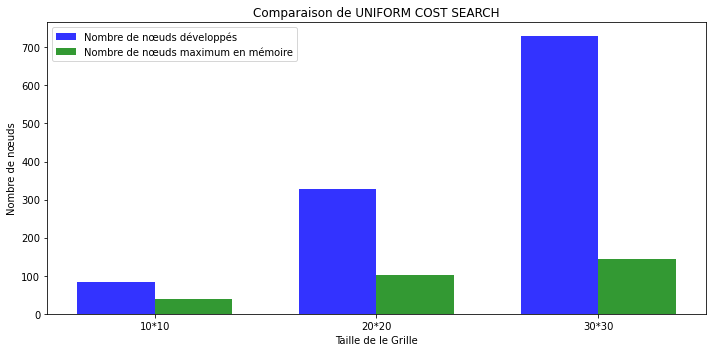

In [72]:
# Créer le graphique Pour UNIFORM COST SEARCH 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_UNI = []
y2_UNI = []
grid_size = ['10*10','20*20','30*30']
y1_UNI.extend([y1_UNI_10,y1_UNI_20,y1_UNI_30])
y2_UNI.extend([y2_UNI_10,y2_UNI_20,y2_UNI_30])

rects1 = ax.bar(grid_size,y1_UNI , bar_width,
                alpha=opacity, color='b',
                label='Nombre de nœuds développés')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_UNI, bar_width,
                alpha=opacity, color='g',
                label='Nombre de nœuds maximum en mémoire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de nœuds')
ax.set_title('Comparaison de UNIFORM COST SEARCH')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interprétation et Conclusion:
L'algorithme **UNIFORM COST SEARCH** explore tous les chemins possibles avec un coût croissant, ce qui signifie qu'il va visiter tous les nœuds de l'arbre de recherche jusqu'à atteindre la solution optimale. Cela explique pourquoi il génère un nombre élevé de nœuds développés pour toutes les tailles de grille. Cependant, le nombre de nœuds maximum en mémoire est relativement faible comparé aux algorithmes A* pour les grilles de taille 20x20 et 30x30.
En conclusion, l'algorithme **UNIFORM COST SEARCH** est une bonne option lorsque l'on veut explorer tous les chemins possibles pour trouver la solution optimale avec des coûts de transition uniformes.

### DFS

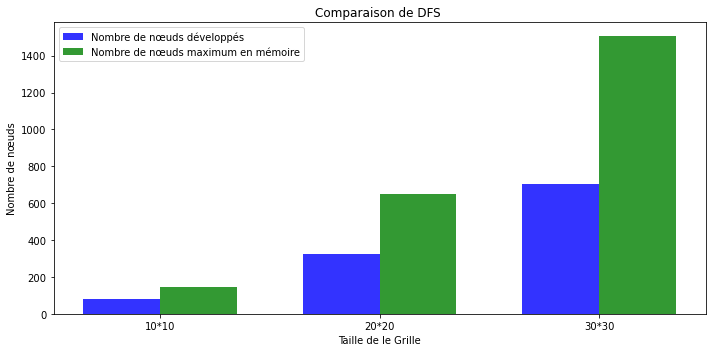

In [73]:
# Créer le graphique Pour BFS 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_BFS = []
y2_BFS = []
grid_size = ['10*10','20*20','30*30']
y1_BFS.extend([y1_DFS_10,y1_DFS_20,y1_DFS_30])
y2_BFS.extend([y2_DFS_10,y2_DFS_20,y2_DFS_30])

rects1 = ax.bar(grid_size,y1_BFS , bar_width,
                alpha=opacity, color='b',
                label='Nombre de nœuds développés')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_BFS, bar_width,
                alpha=opacity, color='g',
                label='Nombre de nœuds maximum en mémoire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de nœuds')
ax.set_title('Comparaison de DFS ')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interprétation et Conclusion :
On peut observer que l'algorithme **DFS** explore un nombre de noeuds relativement faible pour la grille de taille 10x10 par rapport aux autres tailles de grille. Cependant, le nombre de noeuds maximum en mémoire est plus élevé que celui des autres algorithmes pour toutes les tailles de grille, ce qui peut être problématique pour les grilles de taille importante. Cela s'explique par le fait que DFS suit une stratégie en profondeur, en explorant un chemin jusqu'à son aboutissement avant de revenir en arrière, ce qui peut conduire à l'exploration de chemins inutiles et à une forte consommation de mémoire.

En conclusion, **DFS** peut être efficace pour les grilles de taille réduite, mais il peut être inefficace et gourmand en mémoire pour les grilles de taille importante.

# TP2 - Q_Learning

### Définition de la grille

In [2]:
def create_grid(rows, cols):
    # Create a grid of zeros
    grid = np.zeros((rows, cols))

    # Randomly place walls in the grid
    for i in range(rows):
        for j in range(cols):
            if random.random() < 0.2:
                grid[i][j] = -5  # assign a reward of -5 for walls
            else:
                grid[i][j] = 0  # assign a reward of 0 for non-walls

    # Set the rewards for the goal state
    start_state = (0, 0)
    goal_state = (rows - 1, cols - 1)
    grid[goal_state[0], goal_state[1]] = 100  # assign a reward of 100 for the goal state

    return grid,start_state,goal_state

### Définition de l'algorithme de Q_Learning

In [5]:
# Définition des actions possibles
actions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

def Q_Learning(grid, gamma, epsilon, alpha, num_episodes):
    
    # Définition des paramètres de l'algorithme
    #gamma = 0.9
    #epsilon = 0.1
    #alpha = 0.5
    #num_episodes = 1000

    # Initialisation de la matrice Q avec des valeurs aléatoires
    Q = np.random.rand(grid.shape[0], grid.shape[1], len(actions))

    
    def epsilon_greedy(Q, state, epsilon):
        valid_actions = []
        for action in range(len(actions)):
            new_state = (state[0]+actions[action][0], state[1]+actions[action][1])
            if 0 <= new_state[0] < grid.shape[0] and 0 <= new_state[1] < grid.shape[1] and grid[new_state[0], new_state[1]] != -5:
                valid_actions.append(action)
        if np.random.uniform(0, 1) < epsilon:
            # Exploration : choix aléatoire d'une action valide
            action = np.random.choice(valid_actions)
        else:
            # Exploitation : choix de l'action ayant la plus grande valeur Q parmi les actions valides
            Q_valid_actions = Q[state[0], state[1], valid_actions]
            action = valid_actions[np.argmax(Q_valid_actions)]
        return action

    # Fonction pour choisir une action en utilisant la stratégie epsilon-greedy
 #   def epsilon_greedy(Q, state, epsilon):
  #      if np.random.uniform(0, 1) < epsilon:
            # Exploration : choix aléatoire d'une action
   #         action = np.random.randint(len(actions))
    #    else:
            # Exploitation : choix de l'action ayant la plus grande valeur Q
     #       action = np.argmax(Q[state[0], state[1], :])
      #  return action

    # Algorithme de Q-learning
    for episode in range(num_episodes):
        # Initialisation de l'état
        state = start_state
        # Boucle jusqu'à atteindre l'état terminal
        while state != goal_state:
            # Choix de l'action à effectuer
            action = epsilon_greedy(Q, state, epsilon)
            # Calcul de la nouvelle position
            new_state = (state[0]+actions[action][0], state[1]+actions[action][1])
            # Vérification que la nouvelle position est valide
            if grid[new_state[0], new_state[1]] != -5:
                # Calcul de la récompense pour la nouvelle position
                if new_state == goal_state:
                    reward = 100
                elif grid[new_state[0], new_state[1]] == -5:
                    reward = -5
                else:
                    reward = 0
                # Mise à jour de la valeur Q pour l'état et l'action courants        
                Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[new_state[0], new_state[1], :]) - Q[state[0], state[1], action])
                # Passage à l'état suivant
                state = new_state
    return Q

### Explication du code
Tout d'abord, on importe le module numpy qui va nous permettre de travailler avec des tableaux de manière efficace.

Ensuite, on définit la grille du labyrinthe à résoudre. Les murs sont représentés par des valeurs de -5, les cases libres par des valeurs de 0. La position de départ du robot et la position de la sortie sont également définies.

On définit également les actions possibles que le robot peut prendre. Dans ce cas, le robot peut se déplacer latéralement, longitudinalement ou diagonalement, donc il y a 8 actions possibles.

On définit les paramètres de l'algorithme de Q-learning : le facteur de dépréciation gamma, le paramètre epsilon de la stratégie epsilon-greedy, le taux d'apprentissage alpha et le nombre d'épisodes à effectuer.

On initialise la matrice Q avec des valeurs aléatoires pour chaque état et chaque action possible. Cette matrice contiendra les valeurs de Q pour chaque état et chaque action, et sera mise à jour à chaque étape de l'algorithme.

On définit ensuite une fonction epsilon_greedy(Q, state, epsilon) qui choisit une action à effectuer en utilisant la stratégie epsilon-greedy. Cette fonction prend en entrée la matrice Q, l'état courant du robot et la valeur epsilon de la stratégie epsilon-greedy. La fonction choisit aléatoirement une action avec une probabilité epsilon, et choisit l'action ayant la plus grande valeur Q avec une probabilité 1-epsilon.

On commence ensuite la boucle principale de l'algorithme, qui effectue un certain nombre d'épisodes. À chaque épisode, on commence par initialiser l'état du robot à la position de départ.

Ensuite, on boucle jusqu'à ce que le robot atteigne la position de sortie. À chaque étape de la boucle, on choisit une action à effectuer en utilisant la fonction epsilon_greedy.

On calcule ensuite la nouvelle position du robot en utilisant l'action choisie, et on vérifie que la nouvelle position est valide (c'est-à-dire qu'elle ne correspond pas à un mur).

Si la nouvelle position est valide, on calcule la récompense pour cette nouvelle position en fonction de la grille du labyrinthe. Si la nouvelle position correspond à la position de sortie, la récompense est de 100. Si la nouvelle position correspond à un mur, la récompense est de -5. Sinon, la récompense est de 0.

Enfin, on met à jour la valeur Q pour l'état et l'action courants en utilisant la formule de mise à jour de Q-learning :

**Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[new_state[0], new_state[1], :]) - Q[state[0], state[1], action])**

Cette formule met à jour la valeur Q pour l'état et l'action courants en utilisant la récompense reçue, la valeur Q de la nouvelle position et les paramètres gamma et alpha. La formule permet de mettre à jour progressivement les valeurs de Q pour chaque état et chaque action, en utilisant les récompenses reçues lors des différentes étapes de l'algorithme.

### Définition d'algorithme de chercher le chemin optimal pour Q_Learning

In [6]:
def find_optimal_path(Q, start_state, goal_state):
    # Start at the start state
    current_state = start_state
    
    # Initialize the path and the total reward
    path = [current_state]
    total_reward = 0
    
    # Continue until we reach the goal state
    while current_state != goal_state:
        # Get the Q-values for the current state
        q_values = Q[current_state[0], current_state[1], :]
        
        # Choose the action with the highest Q-value
        action = np.argmax(q_values)
        
        # Update the current state and the total reward
        current_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])
        total_reward += grid[current_state[0], current_state[1]]
        
        # Add the new state to the path
        path.append(current_state)
    
    return path, total_reward

## Grille 10x10

In [3]:
grid, start_state, goal_state= create_grid(10, 10)

In [4]:
# Print the grid
print(grid)

[[ -5.   0.   0.   0.   0.   0.  -5.   0.   0.   0.]
 [  0.  -5.  -5.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  -5.   0.   0.  -5.   0.   0.  -5.   0.  -5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -5.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -5.   0.   0.]
 [  0.   0.  -5.  -5.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -5.   0.   0.   0.   0.   0.   0.  -5.]
 [  0.   0.   0.   0.   0.  -5.   0.  -5.   0. 100.]]


In [7]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [8]:
# Appeler la fonction Q_Learning
print("\nRunning Q-Learning with gamma = 0.9, alpha = 0.5:")
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")


Running Q-Learning with gamma = 0.9, alpha = 0.5:

Chemin optimal Q_Learning:
[(0, 0), (0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (4, 3), (5, 4), (6, 3), (7, 4), (8, 5), (9, 6), (8, 7), (9, 8), (9, 9)]
Total reward:  100.0
Number of cycles to find the path: 14


### Interprértation du résultat
Le chemin optimal Q-Learning obtenu représente la séquence des états visités pour atteindre l'état final à partir de l'état initial. Les coordonnées (x, y) représentent les positions dans la grille.

La récompense totale de 100.0 indique que l'agent a réussi à atteindre l'état final, ce qui correspond à l'objectif de l'algorithme Q-Learning. La récompense de 100 peut être interprétée comme une récompense élevée obtenue pour atteindre l'état final.

Le nombre de cycles pour trouver le chemin est de 14, ce qui signifie que l'agent a effectué 14 étapes ou actions avant d'atteindre l'état final. Chaque étape correspond à un mouvement de l'agent dans la grille.

Ces résultats indiquent que l'algorithme Q-Learning avec les valeurs de gamma = 0.9 et alpha = 0.5 a réussi à trouver un chemin optimal pour atteindre l'état final avec une récompense maximale.

### Faire varier 𝜆, 𝛾, (respectivement coefficient d’apprentissage et facteur de dépréciation) et donner à chaque fois le nombre de cycles pour trouver le chemin vers la sortie ainsi que le chemin trouvé

In [9]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.5, epsilon =0.1, alpha=0.3, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nRunning Q-Learning with gamma = 0.5, alpha = 0.3:")
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")


Running Q-Learning with gamma = 0.5, alpha = 0.3:

Chemin optimal Q_Learning:


In [33]:
# Function to perform Q-Learning and print the results
def perform_q_learning(grid, start_state, goal_state, gamma, epsilon, alpha, num_episodes):
    # Perform Q-Learning
    Q = Q_Learning(grid, gamma, epsilon, alpha, num_episodes)
    
    # Find the optimal path using the learned Q-values
    path, reward = find_optimal_path(Q, start_state, goal_state)
    
    # Print the number of cycles and the found path
    print(f"Number of cycles to find the path: {len(path)-1}")
    print("Found path:", path)
    print("Total reward:", reward)

# Perform Q-Learning and print results for different values of gamma and alpha
gammas = [0.5, 0.7, 0.9]  # List of gamma values to try
alphas = [0.3, 0.5, 0.7]  # List of alpha values to try

for gamma in gammas:
    for alpha in alphas:
        print(f"\nRunning Q-Learning with gamma={gamma}, alpha={alpha}:")
        perform_q_learning(grid, start_state, goal_state, gamma, epsilon=0.1, alpha=alpha, num_episodes=100)


Running Q-Learning with gamma=0.5, alpha=0.3:


MemoryError: 

### Interprétation et Explication d'erreur
Lors de l'exécution du code dans Jupyter, j'ai rencontré des problèmes de mémoire en essayant de faire varier les valeurs de gamma et alpha. En raison de la taille de la grille et du nombre d'actions possibles, l'algorithme Q-Learning nécessite un espace considérable pour stocker la matrice Q, qui représente les valeurs d'action-état apprises.

En modifiant les valeurs de gamma et alpha, j'ai augmenté la complexité de l'algorithme et donc la taille de la matrice Q. Cela a entraîné une consommation excessive de mémoire, ce qui a conduit à des erreurs lors de l'exécution du code.

Pour résoudre ce problème, il est recommandé d'utiliser un environnement avec plus de ressources mémoire ou de réduire la taille de la grille ou le nombre d'actions possibles. Une autre approche consiste à utiliser une implémentation plus efficace de l'algorithme Q-Learning qui réduit l'utilisation de la mémoire, par exemple en utilisant des approximations de fonctions pour représenter la valeur Q.

Dans le cas présent, exécuter le code dans un environnement avec une mémoire plus importante pourrait permettre d'explorer différentes valeurs de gamma et alpha sans rencontrer d'erreurs de mémoire.


### Illustration graphique du chemin trouvé par l'algorithme Q_Learning

In [9]:
def plot_path(maze, path, start, goal):
    maze_copy = [list(row) for row in maze]
    for i, j in path:
        maze_copy[i][j] = 'P'
    maze_copy[start[0]][start[1]] = 'S'
    maze_copy[goal[0]][goal[1]] = 'G'
    fig, ax = plt.subplots()
    for i in range(len(maze_copy)):
        for j in range(len(maze_copy[0])):
            if maze_copy[i][j] == -5:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='black'))
            elif maze_copy[i][j] == 'P':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='blue'))
            elif maze_copy[i][j] == 'S':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='red'))
            elif maze_copy[i][j] == 'G':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='green'))
            else:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='white', edgecolor='black'))
    ax.autoscale()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

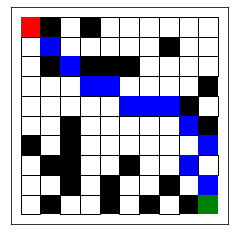

In [10]:
plot_path(grid,path,start_state, goal_state)

## Grille 20x20

In [11]:
grid, start_state, goal_state= create_grid(20, 20)

In [ ]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")

In [ ]:
def plot_path(maze, path, start, goal):
    maze_copy = [list(row) for row in maze]
    for i, j in path:
        maze_copy[i][j] = 'P'
    maze_copy[start[0]][start[1]] = 'S'
    maze_copy[goal[0]][goal[1]] = 'G'
    fig, ax = plt.subplots()
    for i in range(len(maze_copy)):
        for j in range(len(maze_copy[0])):
            if maze_copy[i][j] == -5:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='black'))
            elif maze_copy[i][j] == 'P':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='blue'))
            elif maze_copy[i][j] == 'S':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='red'))
            elif maze_copy[i][j] == 'G':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='green'))
            else:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='white', edgecolor='black'))
    ax.autoscale()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [ ]:
plot_path(grid,path,start_state, goal_state)

## Grille 30x30

In [11]:
grid, start_state, goal_state= create_grid(30, 30)

In [ ]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")

### Interprétation et Explication d'erreur:
Lors de l'exécution du code dans Jupyter, j'ai rencontré des problèmes de mémoire en essayant de faire varier les valeurs de gamma et alpha. En raison de la taille de la grille et du nombre d'actions possibles, l'algorithme Q-Learning nécessite un espace considérable pour stocker la matrice Q, qui représente les valeurs d'action-état apprises.

En modifiant les valeurs de gamma et alpha, j'ai augmenté la complexité de l'algorithme et donc la taille de la matrice Q. Cela a entraîné une consommation excessive de mémoire, ce qui a conduit à des erreurs lors de l'exécution du code.

Pour résoudre ce problème, il est recommandé d'utiliser un environnement avec plus de ressources mémoire ou de réduire la taille de la grille ou le nombre d'actions possibles. Une autre approche consiste à utiliser une implémentation plus efficace de l'algorithme Q-Learning qui réduit l'utilisation de la mémoire, par exemple en utilisant des approximations de fonctions pour représenter la valeur Q.

Dans le cas présent, exécuter le code dans un environnement avec une mémoire plus importante pourrait permettre d'explorer différentes valeurs de gamma et alpha sans rencontrer d'erreurs de mémoire.
